In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

import utils

In [2]:
VOCAB_SIZE = 10000
OOV_TOKEN = '<OOV>'
MAX_LENGTH = 120
TRUNCATING = 'post'
PADDING = 'post'
EMBEDDING_DIM = 16

In [3]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_data, test_data = imdb['train'], imdb['test']

In [4]:
train_sentences = []
train_labels = []

val_sentences = []
val_labels = []

for sentence, label in train_data:
    train_sentences.append(sentence.numpy().decode('utf8'))
    train_labels.append(label.numpy())

for sentence, label in test_data:
    val_sentences.append(sentence.numpy().decode('utf8'))
    val_labels.append(label.numpy())

train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

In [5]:
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])

In [6]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=MAX_LENGTH, padding=PADDING, truncating=TRUNCATING)
val_sequences = tokenizer.texts_to_sequences(val_sentences)
val_padded = pad_sequences(val_sequences, maxlen=MAX_LENGTH, padding=PADDING, truncating=TRUNCATING)
print(f"train_padded.shape = {train_padded.shape}, val_padded.shape = {val_padded.shape}")

train_padded.shape = (25000, 120), val_padded.shape = (25000, 120)


Epoch 1/10
782/782 [==============================] - 16s 20ms/step - loss: 0.4490 - accuracy: 0.7818 - val_loss: 0.4052 - val_accuracy: 0.8219
Epoch 2/10
782/782 [==============================] - 15s 19ms/step - loss: 0.2894 - accuracy: 0.8844 - val_loss: 0.4220 - val_accuracy: 0.8223
Epoch 3/10
782/782 [==============================] - 15s 19ms/step - loss: 0.2342 - accuracy: 0.9110 - val_loss: 0.4547 - val_accuracy: 0.8064
Epoch 4/10
782/782 [==============================] - 15s 19ms/step - loss: 0.1931 - accuracy: 0.9280 - val_loss: 0.5029 - val_accuracy: 0.8074
Epoch 5/10
782/782 [==============================] - 15s 19ms/step - loss: 0.1517 - accuracy: 0.9448 - val_loss: 0.5363 - val_accuracy: 0.8056
Epoch 6/10
782/782 [==============================] - 15s 20ms/step - loss: 0.1128 - accuracy: 0.9591 - val_loss: 0.6676 - val_accuracy: 0.7936
Epoch 7/10
782/782 [==============================] - 15s 20ms/step - loss: 0.0771 - accuracy: 0.9734 - val_loss: 0.7595 - val_accuracy:

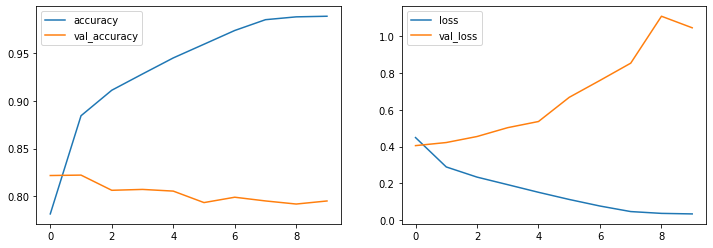

In [7]:
keras.backend.clear_session()

lstm_model = keras.Sequential([
    keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH),
    keras.layers.Bidirectional(keras.layers.LSTM(32)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_history = lstm_model.fit(
    train_padded, 
    train_labels,
    epochs=10, 
    validation_data=(val_padded, val_labels)
)
utils.plot_history(lstm_history)

Epoch 1/10
782/782 [==============================] - 15s 19ms/step - loss: 0.4899 - accuracy: 0.7469 - val_loss: 0.3958 - val_accuracy: 0.8187
Epoch 2/10
782/782 [==============================] - 15s 19ms/step - loss: 0.2966 - accuracy: 0.8812 - val_loss: 0.4048 - val_accuracy: 0.8210
Epoch 3/10
782/782 [==============================] - 15s 19ms/step - loss: 0.2345 - accuracy: 0.9098 - val_loss: 0.4305 - val_accuracy: 0.8178
Epoch 4/10
782/782 [==============================] - 15s 19ms/step - loss: 0.1839 - accuracy: 0.9325 - val_loss: 0.5049 - val_accuracy: 0.8098
Epoch 5/10
782/782 [==============================] - 15s 19ms/step - loss: 0.1305 - accuracy: 0.9543 - val_loss: 0.6138 - val_accuracy: 0.8060
Epoch 6/10
782/782 [==============================] - 15s 19ms/step - loss: 0.0919 - accuracy: 0.9682 - val_loss: 0.7066 - val_accuracy: 0.8052
Epoch 7/10
782/782 [==============================] - 15s 19ms/step - loss: 0.0544 - accuracy: 0.9822 - val_loss: 0.8892 - val_accuracy:

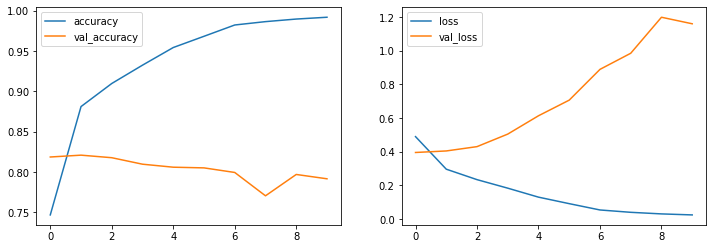

In [8]:
keras.backend.clear_session()

gru_model = keras.Sequential([
    keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH),
    keras.layers.Bidirectional(keras.layers.GRU(32)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

gru_history = gru_model.fit(
    train_padded, 
    train_labels,
    epochs=10, 
    validation_data=(val_padded, val_labels)
)
utils.plot_history(gru_history)

Epoch 1/10
782/782 [==============================] - 6s 7ms/step - loss: 0.4245 - accuracy: 0.7968 - val_loss: 0.4361 - val_accuracy: 0.8006
Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2681 - accuracy: 0.8909 - val_loss: 0.3836 - val_accuracy: 0.8300
Epoch 3/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2083 - accuracy: 0.9201 - val_loss: 0.4270 - val_accuracy: 0.8220
Epoch 4/10
782/782 [==============================] - 6s 7ms/step - loss: 0.1619 - accuracy: 0.9430 - val_loss: 0.4970 - val_accuracy: 0.8133
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 0.1241 - accuracy: 0.9573 - val_loss: 0.5934 - val_accuracy: 0.8080
Epoch 6/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0948 - accuracy: 0.9696 - val_loss: 0.6441 - val_accuracy: 0.8026
Epoch 7/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0756 - accuracy: 0.9756 - val_loss: 0.7816 - val_accuracy: 0.8041
Epoch 

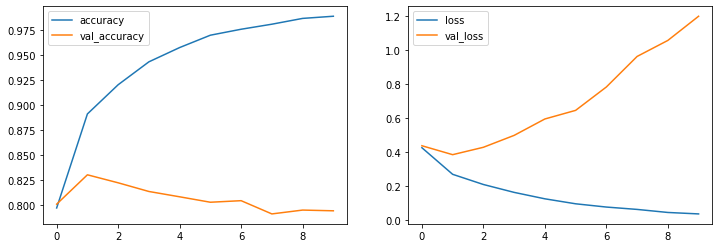

In [9]:
keras.backend.clear_session()

conv1d_model = keras.Sequential([
    keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH),
    keras.layers.Conv1D(128, 5, activation='relu'),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
conv1d_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

conv1d_history = conv1d_model.fit(
    train_padded, 
    train_labels,
    epochs=10, 
    validation_data=(val_padded, val_labels)
)
utils.plot_history(conv1d_history)